<a href="https://colab.research.google.com/github/abhishekalandikar/BreastCancerDiagnosis/blob/main/BreastCancerDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
data = pd.read_csv('data.csv')
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
print(data.shape)     #Records and columns

(569, 32)


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()   #Statistical view of our dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()           # Getting the information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()                    #Checking the null values


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
print(data.shape)

(569, 31)


In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

EDA part

Text(0.5, 1.0, 'Diagnosis vs radius_mean')

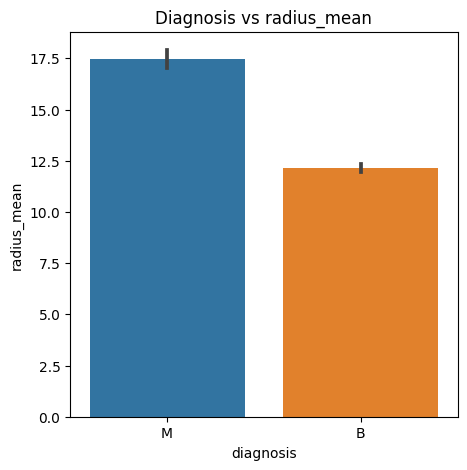

In [ ]:
# Here malign have greater radius than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'radius_mean', data = data)

plt.title('Diagnosis vs radius_mean')

Text(0.5, 1.0, 'Diagnosis vs texture_mean')

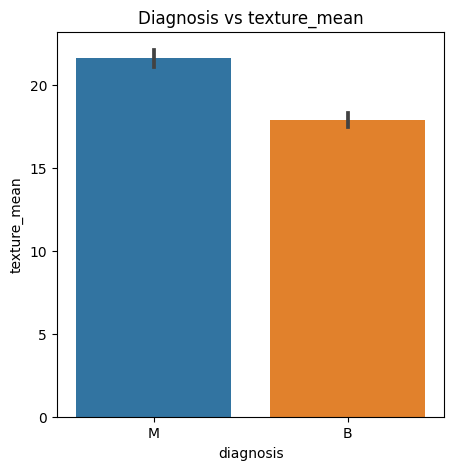

In [ ]:
#here the graph tell us that malign have greater texture than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'texture_mean', data = data)

plt.title('Diagnosis vs texture_mean')

Text(0.5, 1.0, 'Diagnosis vs perimeter_mean')

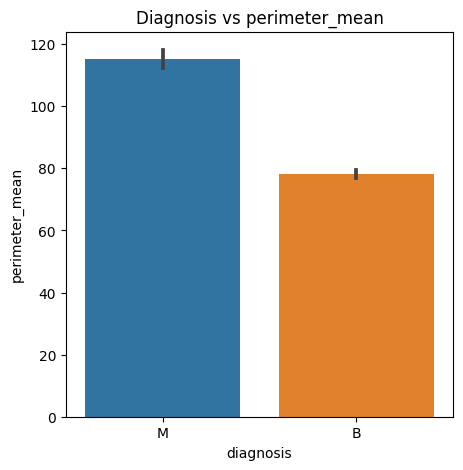

In [ ]:
#malign have greater perimeter than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'perimeter_mean', data = data)

plt.title('Diagnosis vs perimeter_mean')

Text(0.5, 1.0, 'Diagnosis vs area_mean')

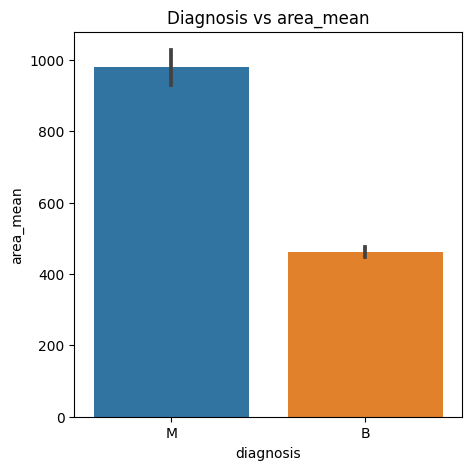

In [ ]:
#Here malign have greater area than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'area_mean', data = data)

plt.title('Diagnosis vs area_mean')

Text(0.5, 1.0, 'Diagnosis vs smoothness_mean')

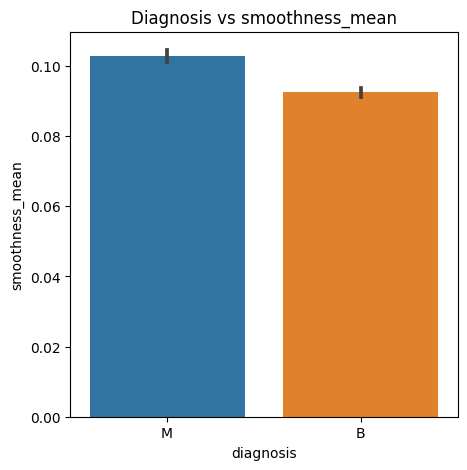

In [ ]:
#Here malign have greater smoothness than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'smoothness_mean', data = data)

plt.title('Diagnosis vs smoothness_mean')

Text(0.5, 1.0, 'Diagnosis vs compactness_mean')

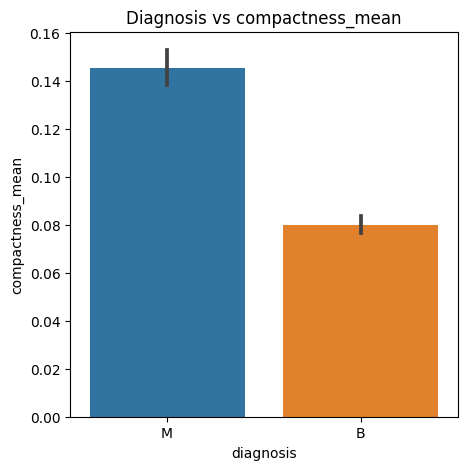

In [ ]:
#Here malign have greater compactness than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'compactness_mean', data = data)

plt.title('Diagnosis vs compactness_mean')

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

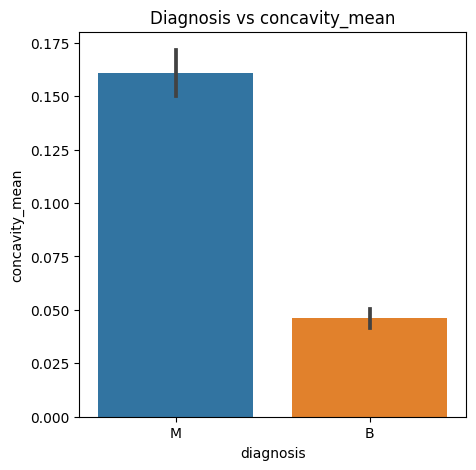

In [ ]:
#Here malign have greater concavity than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = data)

plt.title('Diagnosis vs concavity_mean')

Text(0.5, 1.0, 'Diagnosis vs concave points_mean')

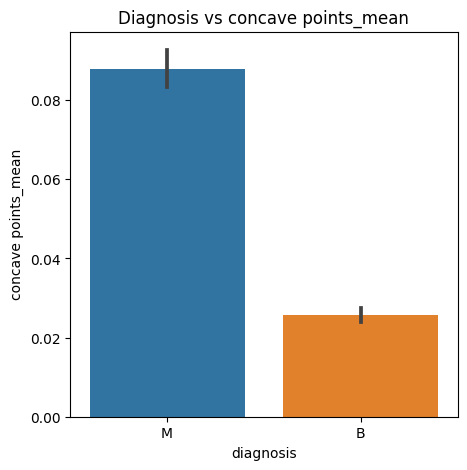

In [ ]:
#Here malign have greater cconcave points than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'concave points_mean', data = data)

plt.title('Diagnosis vs concave points_mean')

Text(0.5, 1.0, 'Diagnosis vs symmetry_mean')

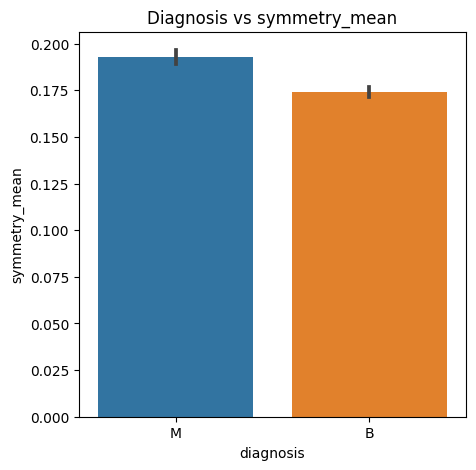

In [ ]:
#Here malign have  slightly greater symmetry than benign
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'symmetry_mean', data = data)

plt.title('Diagnosis vs symmetry_mean')

Text(0.5, 1.0, 'Diagnosis vs fractal_dimension_mean')

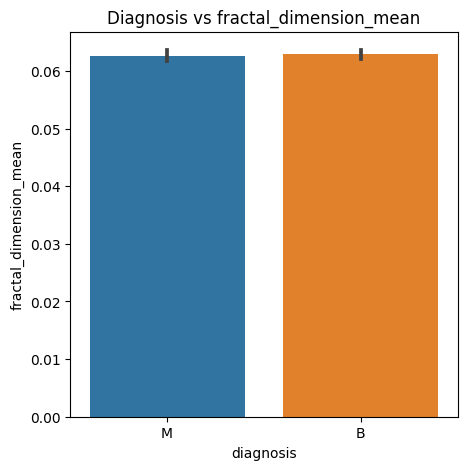

In [ ]:
#Here malign cells have almost same equal size as benign cells
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = data)

plt.title('Diagnosis vs fractal_dimension_mean')

<ipython-input-53-ce85fda8b38b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-53-ce85fda8b38b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

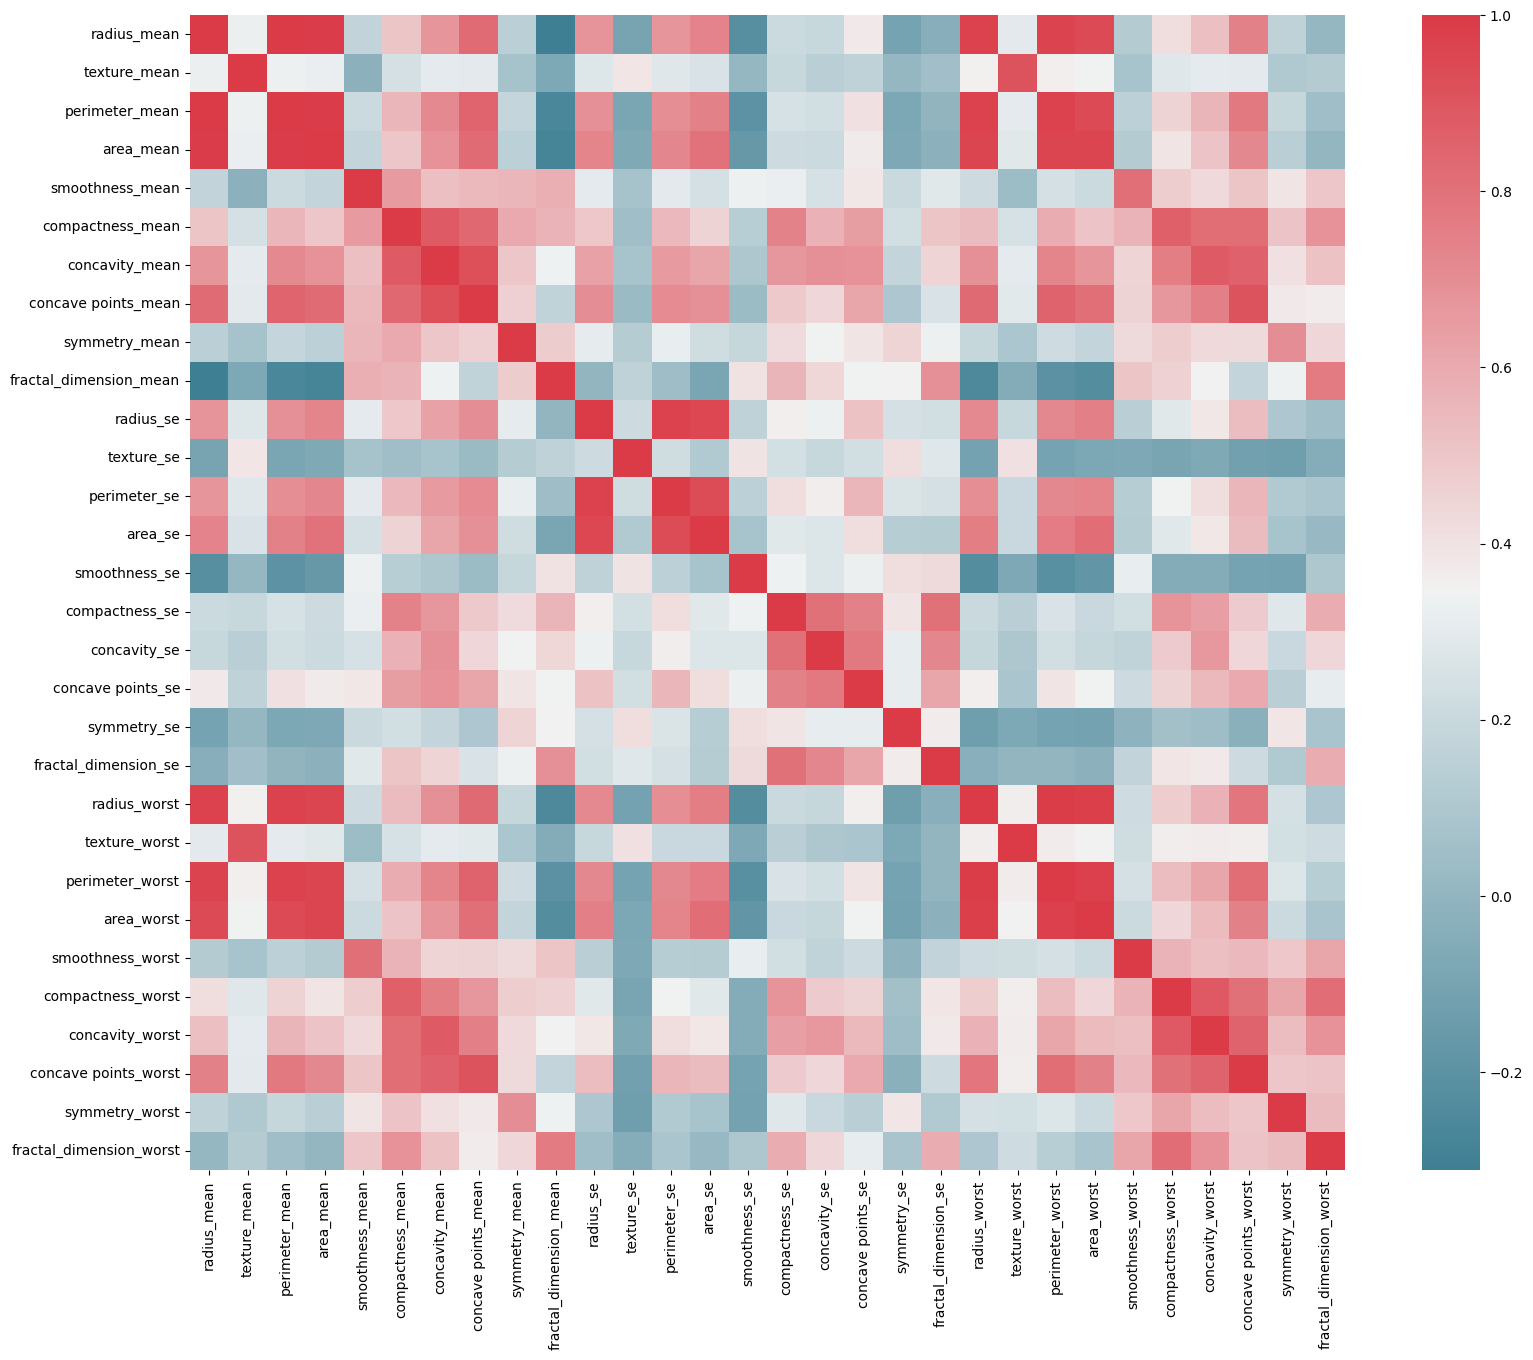

In [ ]:
#Heatmap of dataset in order to find correlation among features(columns)
f, ax = plt.subplots(figsize=(20, 15))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# Identifying indepedent (x) and dependent (y)

x = data.iloc[:,1:]
y = data.iloc[:,0]

print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
#Train test splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# creating a model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.9440559440559441
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.96      0.89      0.92        54

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

[[87  2]
 [ 6 48]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a model
model = RandomForestClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[88  1]
 [ 4 50]]


Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9859154929577465
Testing accuarcy : 0.986013986013986
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

[[89  0]
 [ 2 52]]


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training accuracy : 0.9882629107981221
Testing accuarcy : 0.972027972027972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[88  1]
 [ 3 51]]


In [ ]:
# using grid search to find the best parameters for svm

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
model2 = SVC(C = 1.3, gamma = 0.1, kernel = 'linear')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

print("Testing accuarcy :", model.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Testing accuarcy : 0.972027972027972
